In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [2]:
df = pd.read_csv("weight_height.csv")

In [3]:
#pd.read_csv?

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df['BMI'] = df["Weight"] / (df["Height"] ** 2) 

In [6]:
df.columns

Index(['Gender', 'Height', 'Weight', 'BMI'], dtype='object')

In [7]:
df.head()

,Gender,Height,Weight,BMI
0,Male,73.847017,241.893563,0.044357
1,Male,68.781904,162.310473,0.034308
2,Male,74.110105,212.740856,0.038734
3,Male,71.730978,220.042470,0.042765
4,Male,69.881796,206.349801,0.042255


In [8]:
df = df.reset_index()

In [9]:
df.head()

,index,Gender,Height,Weight,BMI
0,0,Male,73.847017,241.893563,0.044357
1,1,Male,68.781904,162.310473,0.034308
2,2,Male,74.110105,212.740856,0.038734
3,3,Male,71.730978,220.042470,0.042765
4,4,Male,69.881796,206.349801,0.042255


In [99]:
df = df.dropna()

In [10]:
df = df.loc[:,"Gender":"BMI"]

In [11]:
df.head()

,Gender,Height,Weight,BMI
0,Male,73.847017,241.893563,0.044357
1,Male,68.781904,162.310473,0.034308
2,Male,74.110105,212.740856,0.038734
3,Male,71.730978,220.042470,0.042765
4,Male,69.881796,206.349801,0.042255


In [97]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,1.685736,0.097727,1.378284,1.613043,1.684479,1.757026,2.006568
Weight,10000.0,73.228201,14.564160,29.347519,61.606105,73.125041,84.898769,122.465413
BMI,10000.0,25.475508,2.693815,15.448781,23.464854,25.733367,27.558591,33.028169


In [12]:
df.groupby("Gender").sum()

,Height,Weight,BMI
Gender,,,
Female,318543.868017,679300.465037,166.567699
Male,345131.729531,935103.103291,195.778763


In [13]:
df = df.set_index('Gender')

In [14]:
df.head()

,Height,Weight,BMI
Gender,,,
Male,73.847017,241.893563,0.044357
Male,68.781904,162.310473,0.034308
Male,74.110105,212.740856,0.038734
Male,71.730978,220.042470,0.042765
Male,69.881796,206.349801,0.042255


In [15]:
df.loc["Male"].describe()

,Height,Weight,BMI
count,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,0.039156
std,2.863362,19.781155,0.002148
min,58.406905,112.902939,0.029897
25%,67.174679,173.887767,0.037737
50%,69.027709,187.033546,0.039148
75%,70.988744,200.357802,0.040610
max,78.998742,269.989699,0.046977


In [16]:
df.Weight = df["Weight"] / 2.20462

In [17]:
df.Height = df["Height"] * 0.0254

In [18]:
df.head()

,Height,Weight,BMI
Gender,,,
Male,1.875714,109.721205,0.044357
Male,1.747060,73.622879,0.034308
Male,1.882397,96.497744,0.038734
Male,1.821967,99.809704,0.042765
Male,1.774998,93.598806,0.042255


In [19]:
df['BMI'] = df["Weight"] / (df["Height"] ** 2) 

In [20]:
df.head()

,Height,Weight,BMI
Gender,,,
Male,1.875714,109.721205,31.185824
Male,1.747060,73.622879,24.121093
Male,1.882397,96.497744,27.232961
Male,1.821967,99.809704,30.067120
Male,1.774998,93.598806,29.708092


In [21]:
#df.where((df.BMI > 18.4) & (df.BMI < 25))

df_healthy_bmi = df[(df.BMI > 18.4) & (df.BMI < 25)]

In [22]:
df_healthy_bmi.head()

,Height,Weight,BMI
Gender,,,
Male,1.747060,73.622879,24.121093
Male,1.708227,69.042355,23.660539
Male,1.680188,67.664072,23.968585
Male,1.724487,73.485069,24.710365
Male,1.739809,70.008727,23.128585


In [23]:
df_healthy_bmi = df_healthy_bmi.sort_values('BMI', ascending=False)

In [24]:
df_healthy_bmi.head()

,Height,Weight,BMI
Gender,,,
Female,1.682417,70.762916,24.999923
Female,1.548917,59.973393,24.997831
Female,1.600100,63.989294,24.992688
Female,1.547517,59.846789,24.990213
Male,1.778884,79.072511,24.987917


In [51]:
df_females = df.loc["Female"]

In [52]:
df_males = df.loc["Male"]

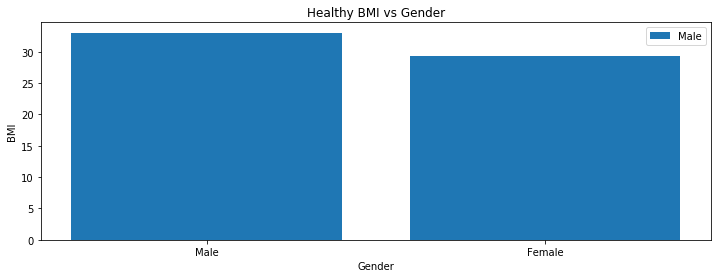

In [55]:
plt.figure(figsize=(12,4))
plt.bar(df.index, df.BMI)

plt.xlabel("Gender")
plt.ylabel("BMI")
plt.title("Healthy BMI vs Gender")

plt.legend(df.index)

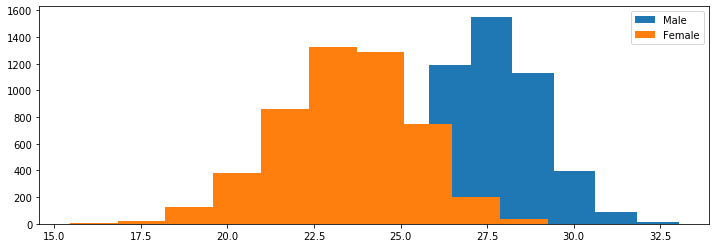

In [88]:
plt.figure(figsize=(12,4))
plt.hist(df_males.BMI)
plt.hist(df_females.BMI)

plt.legend(["Male", "Female"])

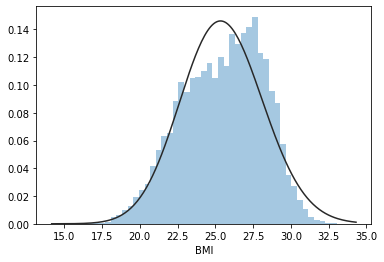

In [35]:
seaborn.distplot(df.BMI, kde=False, fit=stats.gamma)

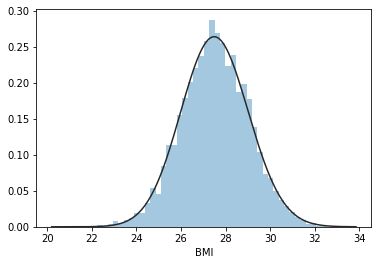

In [57]:
seaborn.distplot(df_males.BMI, kde=False, fit=stats.gamma)

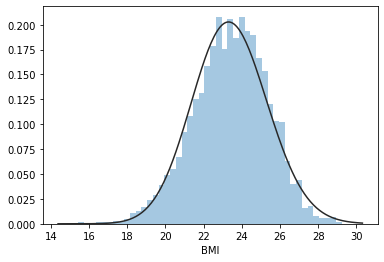

In [58]:
seaborn.distplot(df_females.BMI, kde=False, fit=stats.gamma)

<Figure size 864x288 with 0 Axes>

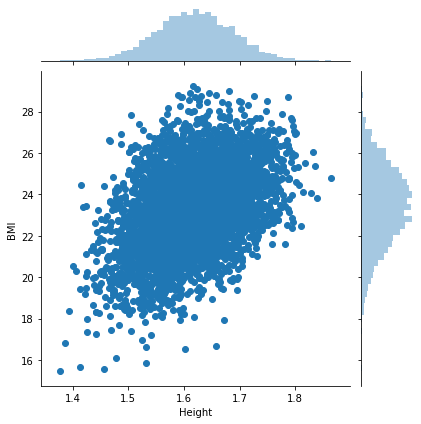

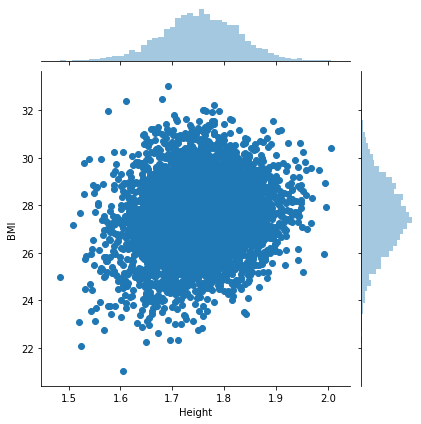

In [59]:
plt.figure(figsize=(12,4))
seaborn.jointplot(x="Height", y="BMI", data=df_females)
seaborn.jointplot(x="Height", y="BMI", data=df_males)

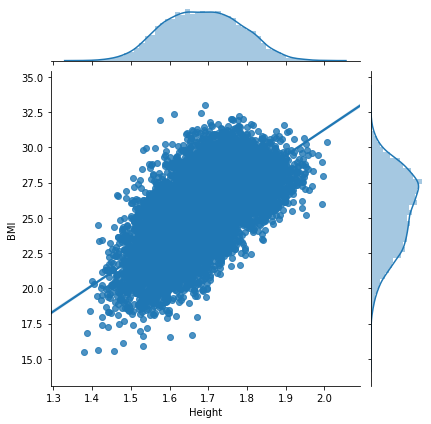

In [75]:
seaborn.jointplot("Height", "BMI", data=df, kind="reg")

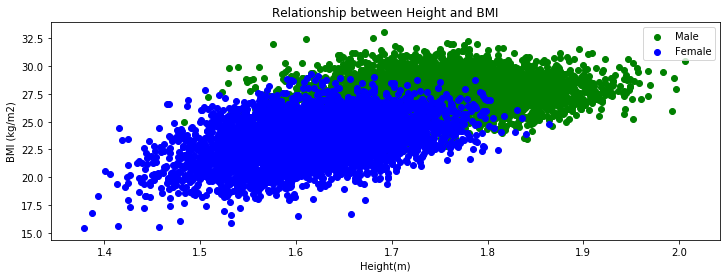

In [73]:
plt.figure(figsize=(12,4))
plt.scatter(df_males.Height, df_males.BMI, color="g")
plt.scatter(df_females.Height, df_females.BMI, color="b")

plt.xlabel("Height (m)")
plt.ylabel("BMI (kg/m2)")

plt.title("Relationship between Height and BMI")

plt.legend(["Male", "Female"])

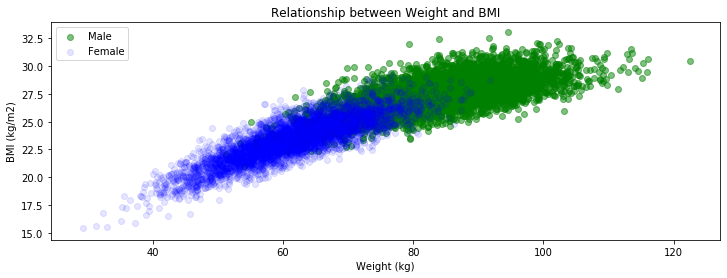

In [83]:
plt.figure(figsize=(12,4))
plt.scatter(df_males.Weight, df_males.BMI, color="g", alpha=0.5)
plt.scatter(df_females.Weight, df_females.BMI, color="b", alpha=0.1)

plt.xlabel("Weight (kg)")
plt.ylabel("BMI (kg/m2)")

plt.title("Relationship between Weight and BMI")
plt.legend(["Male", "Female"])

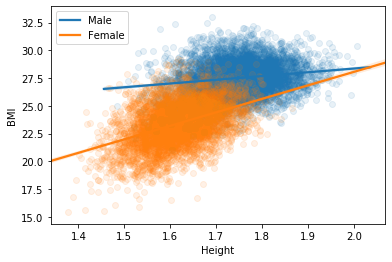

In [87]:
seaborn.regplot(x="Height", y="BMI", data=df_males, scatter_kws={'alpha':0.1})
seaborn.regplot(x="Height", y="BMI", data=df_females, scatter_kws={'alpha':0.1})

plt.legend(["Male", "Female"])

In [89]:
df['Height'].corr(df["BMI"])

0.6691991172183597

In [90]:
df_males['Height'].corr(df_males["BMI"])

0.16256306767006037

In [91]:
df_females['Height'].corr(df_females["BMI"])

0.4277433566441102

In [94]:
df['Weight'].corr(df["BMI"])

0.896438346298096

In [92]:
df_males['Weight'].corr(df_males["BMI"])

0.6358400075047297

In [93]:
df_females['Weight'].corr(df_females["BMI"])

0.8364346337353542

In [95]:
df.corr()

,Height,Weight,BMI
Height,1.000000,0.924756,0.669199
Weight,0.924756,1.000000,0.896438
BMI,0.669199,0.896438,1.000000


In [122]:
# df.dropna?

In [101]:
# df.fillna?

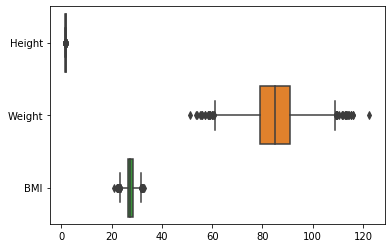

In [112]:
seaborn.boxplot(data=df_males, orient='h')

In [117]:
df = df.reset_index()

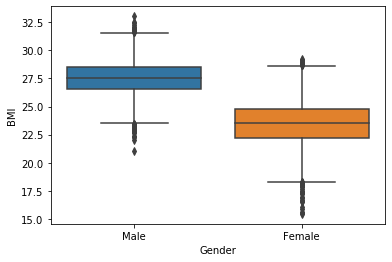

In [121]:
seaborn.boxplot(x='Gender', y='BMI', data=df)

In [127]:
df.index = df.ix[:,0]

C:\Users\i11044\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [128]:
df.index

Index(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male',
       ...
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female'],
      dtype='object', name='Gender', length=10000)

In [135]:
df = df.loc[:,'Height':]
df.head()

,Height,Weight,BMI
Gender,,,
Male,1.875714,109.721205,31.185824
Male,1.747060,73.622879,24.121093
Male,1.882397,96.497744,27.232961
Male,1.821967,99.809704,30.067120
Male,1.774998,93.598806,29.708092


In [142]:
from sklearn.cluster import KMeans

In [157]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_males.loc[:,['Height','BMI']].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [158]:
print(kmeans.cluster_centers_)

[[ 1.76291821 28.75750556]
 [ 1.74409452 26.36137931]]


In [159]:
print(kmeans.labels_)

[0 1 1 ... 0 1 0]


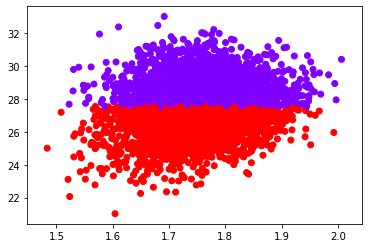

In [162]:
plt.scatter(df_males['Height'], df_males['BMI'], c=kmeans.labels_, cmap='rainbow')